In [9]:
import numpy as np
import torch

import warnings
warnings.filterwarnings('ignore')

In [2]:
from torchvision import datasets
from torchvision.transforms import transforms


batch_size = 20

transform = transforms.ToTensor()

train_data = datasets.MNIST(root='data', train=True, download=True, transform=transform)
test_data = datasets.MNIST(root='data', train=False, download=True, transform=transform)

train_loader = torch.utils.data.DataLoader(train_data, batch_size = batch_size)
test_loader = torch.utils.data.DataLoader(test_data, batch_size = batch_size)

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

dataiter = iter(train_loader)
images, labels = dataiter.next()
images = images.numpy()

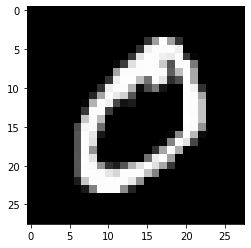

In [19]:
plt.imshow(np.squeeze(images[1]), cmap='gray')

In [35]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()

        hidden_1 = 512
        hidden_2 = 512

        self.fc1 = nn.Linear(28 * 28, hidden_1)

        self.fc2 = nn.Linear(hidden_1, hidden_2)

        self.fc3 = nn.Linear(hidden_2, 10)

        self.dropout = nn.Dropout(0.2)

    def forward(self, x):

        x = x.view(-1, 28 * 28) # flattening

        x = F.relu(self.fc1(x))
        x = self.dropout(x)

        x = F.relu(self.fc2(x))
        x = self.dropout(x)

        x = self.fc3(x)
        return x


model = Net()
print(model)

Net(
  (fc1): Linear(in_features=784, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=512, bias=True)
  (fc3): Linear(in_features=512, out_features=10, bias=True)
  (dropout): Dropout(p=0.2, inplace=False)
)


In [36]:
model = Network()
model

Network(
  (fc1): Linear(in_features=784, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=512, bias=True)
  (fc3): Linear(in_features=512, out_features=10, bias=True)
  (dropout): Dropout(p=0.2, inplace=False)
)

In [37]:
criterion = nn.CrossEntropyLoss()

optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

In [38]:
epochs = 10

for epoch in range(epochs):
    train_loss = 0
    
    for data, target in train_loader:

        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()
        train_loss += loss.item() * data.size(0)
        
    train_loss = train_loss/len(train_loader.dataset)
    print('Epoch: {} \tTraining Loss: {:.6f}'.format(
        epoch+1, 
        train_loss
        ))
        

Epoch: 1 	Training Loss: 0.820372
Epoch: 2 	Training Loss: 0.326176
Epoch: 3 	Training Loss: 0.254730
Epoch: 4 	Training Loss: 0.206214
Epoch: 5 	Training Loss: 0.173206
Epoch: 6 	Training Loss: 0.150547
Epoch: 7 	Training Loss: 0.132587
Epoch: 8 	Training Loss: 0.117463
Epoch: 9 	Training Loss: 0.106691
Epoch: 10 	Training Loss: 0.096060


In [43]:

test_loss = 0.0
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))



for data, target in test_loader:

    output = model(data)

    loss = criterion(output, target)

    test_loss += loss.item()*data.size(0)
    # convert output probabilities to predicted class
    _, pred = torch.max(output, 1)
    # compare predictions to true label
    correct = np.squeeze(pred.eq(target.data.view_as(pred)))
    # calculate test accuracy for each object class
    for i in range(len(target)):
        label = target.data[i]
        class_correct[label] += correct[i].item()
        class_total[label] += 1

# avg test loss
test_loss = test_loss/len(test_loader.sampler)
print('Test Loss: {:.6f}\n'.format(test_loss))

for i in range(10):
    if class_total[i] > 0:
        print('Test Accuracy of %5s: %2d%% (%2d/%2d)' % (
            str(i), 100 * class_correct[i] / class_total[i],
            np.sum(class_correct[i]), np.sum(class_total[i])))
    else:
        print('Test Accuracy of %5s: N/A (no training examples)' % (classes[i]))

print('\nTest Accuracy (Overall): %2d%% (%2d/%2d)' % (
    100. * np.sum(class_correct) / np.sum(class_total),
    np.sum(class_correct), np.sum(class_total)))

Test Loss: 0.087841

Test Accuracy of     0: 99% (971/980)
Test Accuracy of     1: 98% (1123/1135)
Test Accuracy of     2: 96% (999/1032)
Test Accuracy of     3: 97% (986/1010)
Test Accuracy of     4: 97% (957/982)
Test Accuracy of     5: 97% (869/892)
Test Accuracy of     6: 97% (932/958)
Test Accuracy of     7: 96% (990/1028)
Test Accuracy of     8: 96% (937/974)
Test Accuracy of     9: 96% (974/1009)

Test Accuracy (Overall): 97% (9738/10000)
